In [8]:
from pathlib import Path
import torch
import matplotlib.pyplot as plt
import os
from torchmetrics.functional.pairwise import pairwise_cosine_similarity


def plot(sim, type: str = 'mean'):
    plt.figure(figsize=(10, 10))
    plt.imshow(sim, cmap='hot', interpolation='nearest')
    if type == 'mean':
        plt.title('Mean Cosine Similarity')
    else: 
        plt.title('Std Cosine Similarity')
        plt.clim(0, 0.4) 
    plt.colorbar()

In [5]:
strawberry = "/root/multiview-robust-clip/data/objaverse/renderings/dd6a424807614544835c8cc4529d6f0d"
banana = "/root/multiview-robust-clip/data/objaverse/renderings/ade2b59ff37c44059433414f39c94abe"
apple_red_tasty = "/root/multiview-robust-clip/data/objaverse/renderings/50492962b9f641669238d37e071e0bb9"

In [14]:
import glob

pt_files = sorted(glob.glob(os.path.join(apple_red_tasty, '*.pt')))
tensor_list = [torch.load(file) for file in pt_files]
tensor = torch.stack(tensor_list)

images = tensor[:36]
text = tensor[36]

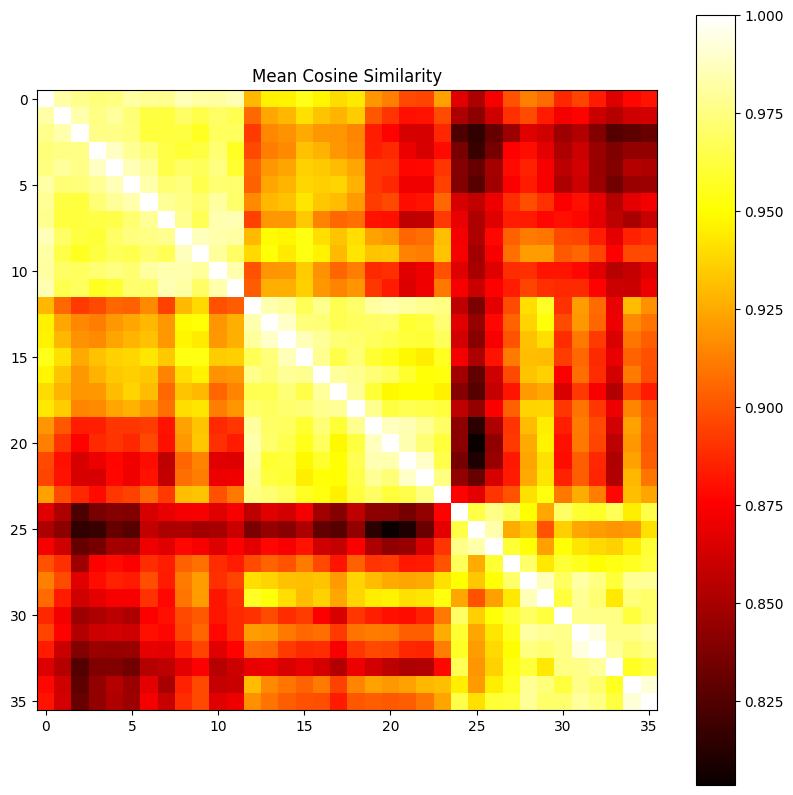

In [15]:
plot(pairwise_cosine_similarity(images, images))